# Initial Data Analysis: Walmart vs Stellantis

This section analyzes the historical price data and return characteristics of Walmart (WMT) and Stellantis (STLA) compared to the broader market (S&P 500).

## Summary Statistics

The analysis of the 5-year historical data (April 2020 - April 2025) reveals significant differences in the risk-return profiles of these companies:

| Company    | Annual Return | Annual Risk (Std Dev) | Sharpe Ratio |
|------------|---------------|------------------------|--------------|
| Stellantis | 18.01%        | 38.71%                 | 0.47         |
| Walmart    | 19.46%        | 21.07%                 | 0.92         |
| S&P 500    | 14.92%        | 17.96%                 | 0.83         |

Key observations:
- **Returns**: Both companies outperformed the S&P 500's 14.92% annual return, with Walmart slightly leading at 19.46% compared to Stellantis's 18.01%.
- **Risk**: Stellantis exhibits substantially higher volatility (38.71%) compared to both Walmart (21.07%) and the broader market (17.96%), reflecting the cyclical nature of the automotive industry.
- **Risk-Adjusted Performance**: Walmart demonstrates superior risk-adjusted returns with a Sharpe ratio of 0.92, significantly higher than Stellantis (0.47) and even outperforming the S&P 500 (0.83).

This initial comparison highlights Walmart's strong risk-adjusted performance, suggesting that despite being a mature retailer, it has delivered considerable value to investors with relatively modest volatility. Stellantis, while offering similar raw returns, comes with substantially higher risk - characteristic of the automotive sector with its sensitivity to economic cycles, supply chain disruptions, and technology transitions.

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats
import datetime as dt
from tabulate import tabulate

# Set plot style
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

# Define company tickers
walmart_ticker = "WMT"
stellantis_ticker = "STLA"
market_ticker = "^GSPC"  # S&P 500 index

# Set time period (5 years)
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=5*365)

# Download historical data
tickers = [walmart_ticker, stellantis_ticker, market_ticker]
data = yf.download(tickers, start=start_date, end=end_date)

# Check available columns
print("Available columns in data:")
print(data.columns)

# Use 'Close' if 'Adj Close' is not available
if 'Adj Close' in data.columns:
    price_data = data['Adj Close']
else:
    price_data = data['Close']

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Display the first few rows of returns
print("Daily returns for the companies and the market:")
print(returns.head())

# Calculate annual returns (252 trading days per year)
annual_returns = returns.mean() * 252
annual_std = returns.std() * np.sqrt(252)

# Create a summary table
summary = pd.DataFrame({
    'Annual Return': annual_returns,
    'Annual Risk (Std Dev)': annual_std,
    'Sharpe Ratio': annual_returns / annual_std
})

print("\nSummary Statistics:")
print(summary)

[*********************100%***********************]  3 of 3 completed

Available columns in data:
MultiIndex([( 'Close',  'STLA'),
            ( 'Close',   'WMT'),
            ( 'Close', '^GSPC'),
            (  'High',  'STLA'),
            (  'High',   'WMT'),
            (  'High', '^GSPC'),
            (   'Low',  'STLA'),
            (   'Low',   'WMT'),
            (   'Low', '^GSPC'),
            (  'Open',  'STLA'),
            (  'Open',   'WMT'),
            (  'Open', '^GSPC'),
            ('Volume',  'STLA'),
            ('Volume',   'WMT'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])
Daily returns for the companies and the market:
Ticker          STLA       WMT     ^GSPC
Date                                    
2020-04-16 -0.006468  0.027726  0.005817
2020-04-17  0.048177 -0.001587  0.026794
2020-04-20 -0.013665 -0.017182 -0.017881
2020-04-21 -0.026448 -0.004929 -0.030675
2020-04-22  0.010349  0.018420  0.022930

Summary Statistics:
        Annual Return  Annual Risk (Std Dev)  Sharpe Ratio
Ticker                  

Correlation between Walmart and Stellantis:
Ticker       WMT      STLA
Ticker                    
WMT     1.000000  0.164834
STLA    0.164834  1.000000


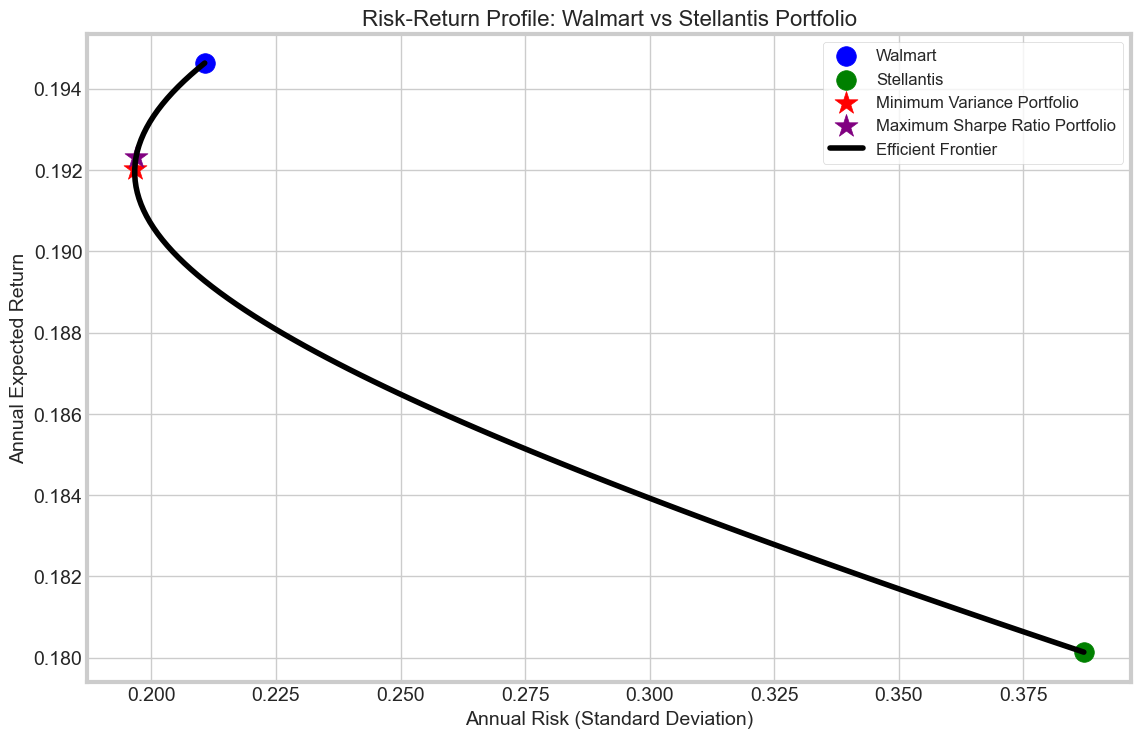


Minimum Variance Portfolio:
Walmart Weight: 82.00%
Stellantis Weight: 18.00%
Expected Annual Return: 19.20%
Expected Annual Risk: 19.67%

Maximum Sharpe Ratio Portfolio:
Walmart Weight: 84.00%
Stellantis Weight: 16.00%
Expected Annual Return: 19.23%
Expected Annual Risk: 19.69%
Sharpe Ratio: 0.7735


In [6]:
# Calculate correlation between the stocks
correlation = returns[[walmart_ticker, stellantis_ticker]].corr()
print("Correlation between Walmart and Stellantis:")
print(correlation)

# Create a range of weights for the portfolio
weights = np.linspace(0, 1, 101)
portfolio_returns = []
portfolio_risks = []

# Calculate returns and risks for different portfolio weights
for weight in weights:
    # Portfolio return
    port_return = weight * annual_returns[walmart_ticker] + (1 - weight) * annual_returns[stellantis_ticker]
    portfolio_returns.append(port_return)
    
    # Portfolio risk (using correlation)
    walmart_var = annual_std[walmart_ticker] ** 2
    stellantis_var = annual_std[stellantis_ticker] ** 2
    covariance = correlation.loc[walmart_ticker, stellantis_ticker] * annual_std[walmart_ticker] * annual_std[stellantis_ticker]
    
    port_var = (weight ** 2 * walmart_var) + ((1 - weight) ** 2 * stellantis_var) + (2 * weight * (1 - weight) * covariance)
    port_risk = np.sqrt(port_var)
    portfolio_risks.append(port_risk)

# Find the minimum variance portfolio
min_var_idx = np.argmin(portfolio_risks)
min_var_weight = weights[min_var_idx]
min_var_return = portfolio_returns[min_var_idx]
min_var_risk = portfolio_risks[min_var_idx]

# Find the tangency portfolio (maximum Sharpe ratio)
risk_free_rate = 0.04  # Assuming a 4% risk-free rate
sharpe_ratios = [(r - risk_free_rate) / risk for r, risk in zip(portfolio_returns, portfolio_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
max_sharpe_weight = weights[max_sharpe_idx]
max_sharpe_return = portfolio_returns[max_sharpe_idx]
max_sharpe_risk = portfolio_risks[max_sharpe_idx]

# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(annual_std[walmart_ticker], annual_returns[walmart_ticker], 
            marker='o', s=200, color='blue', label=f'Walmart')
plt.scatter(annual_std[stellantis_ticker], annual_returns[stellantis_ticker], 
            marker='o', s=200, color='green', label=f'Stellantis')
plt.scatter(min_var_risk, min_var_return, 
            marker='*', s=300, color='red', label=f'Minimum Variance Portfolio')
plt.scatter(max_sharpe_risk, max_sharpe_return, 
            marker='*', s=300, color='purple', label=f'Maximum Sharpe Ratio Portfolio')

# Plot the efficient frontier
plt.plot(portfolio_risks, portfolio_returns, 'k-', label='Efficient Frontier')

plt.title('Risk-Return Profile: Walmart vs Stellantis Portfolio', fontsize=16)
plt.xlabel('Annual Risk (Standard Deviation)', fontsize=14)
plt.ylabel('Annual Expected Return', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Print the optimal portfolio compositions
print(f"\nMinimum Variance Portfolio:")
print(f"Walmart Weight: {min_var_weight:.2%}")
print(f"Stellantis Weight: {(1-min_var_weight):.2%}")
print(f"Expected Annual Return: {min_var_return:.2%}")
print(f"Expected Annual Risk: {min_var_risk:.2%}")

print(f"\nMaximum Sharpe Ratio Portfolio:")
print(f"Walmart Weight: {max_sharpe_weight:.2%}")
print(f"Stellantis Weight: {(1-max_sharpe_weight):.2%}")
print(f"Expected Annual Return: {max_sharpe_return:.2%}")
print(f"Expected Annual Risk: {max_sharpe_risk:.2%}")
print(f"Sharpe Ratio: {sharpe_ratios[max_sharpe_idx]:.4f}")

# Portfolio Risk-Return Analysis: Walmart & Stellantis

This analysis builds a diversified portfolio combining Walmart and Stellantis stocks to optimize the risk-return profile compared to holding either stock individually.

## Correlation Analysis

The correlation between Walmart and Stellantis is remarkably low at **0.165**, indicating these stocks move relatively independently of each other. This low correlation creates significant diversification benefits when combining these securities in a portfolio.

## Portfolio Optimization Results

The analysis identifies two key optimal portfolios:

### Minimum Variance Portfolio (Lowest Risk)
- **Walmart Weight: 82.00%**
- **Stellantis Weight: 18.00%**
- **Expected Annual Return: 19.20%**
- **Expected Annual Risk: 19.67%**

This portfolio achieves the lowest possible risk level for any combination of these two stocks. Notably, the risk level (19.67%) is substantially lower than Stellantis's individual risk (38.71%) and even slightly below Walmart's standalone risk (21.07%).

### Maximum Sharpe Ratio Portfolio (Best Risk-Adjusted Return)
- **Walmart Weight: 84.00%**
- **Stellantis Weight: 16.00%**
- **Expected Annual Return: 19.23%**
- **Expected Annual Risk: 19.69%**
- **Sharpe Ratio: 0.7735**

This portfolio maximizes risk-adjusted returns (measured by the Sharpe ratio). It achieves nearly the same risk level as the minimum variance portfolio but with a slightly higher expected return.

## Efficient Frontier Insights

The efficient frontier graph illustrates several important findings:

1. **Dominant Allocation to Walmart**: Both optimal portfolios heavily favor Walmart (82-84%), reflecting its superior risk-adjusted returns.

2. **Limited Diversification Effect**: The efficient frontier curve is relatively flat at the left end, indicating that small allocations to Stellantis (16-18%) provide optimal diversification benefits.

3. **Risk Reduction Benefits**: While the return differences are modest, the portfolio's risk reduction compared to holding individual stocks is substantial - particularly compared to Stellantis alone.

4. **Near-Identical Optimal Portfolios**: The minimum variance and maximum Sharpe ratio portfolios are nearly identical in composition and characteristics, suggesting robustness in the optimal allocation.

This portfolio analysis demonstrates the practical application of Modern Portfolio Theory, showing how combining assets with low correlation and different risk-return characteristics can create portfolios with better risk-adjusted performance than individual investments.